# Comparison MTCNN-InceptionResnetV1 Fine-tuning Results

In [17]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt

## 1. Data preprocessing

### 1) read files: string lists

In [9]:
fine_tuning01 = """
Epoch 1/8
----------
Train |   174/174  | loss:    4.5792 | fps:    9.2119 | acc:    0.0830   
Valid |    44/44   | loss:    4.4895 | fps:   28.4783 | acc:    0.0745   

Epoch 2/8
----------
Train |   174/174  | loss:    2.3902 | fps:    9.6076 | acc:    0.4032   
Valid |    44/44   | loss:    2.0684 | fps:   27.7559 | acc:    0.4327   

Epoch 3/8
----------
Train |   174/174  | loss:    1.0903 | fps:    9.5416 | acc:    0.7293   
Valid |    44/44   | loss:    2.1898 | fps:   27.8677 | acc:    0.4786   

Epoch 4/8
----------
Train |   174/174  | loss:    0.5100 | fps:    9.5267 | acc:    0.8797   
Valid |    44/44   | loss:    0.8549 | fps:   27.7706 | acc:    0.7635   

Epoch 5/8
----------
Train |   174/174  | loss:    0.2890 | fps:    8.9395 | acc:    0.9370   
Valid |    44/44   | loss:    0.5499 | fps:   26.3761 | acc:    0.8484   

Epoch 6/8
----------
Train |   174/174  | loss:    0.1190 | fps:    9.0287 | acc:    0.9790   
Valid |    44/44   | loss:    0.1956 | fps:   27.0960 | acc:    0.9482   

Epoch 7/8
----------
Train |   174/174  | loss:    0.0677 | fps:    9.2442 | acc:    0.9907   
Valid |    44/44   | loss:    0.1828 | fps:   27.9821 | acc:    0.9524   

Epoch 8/8
----------
Train |   174/174  | loss:    0.0546 | fps:    9.4453 | acc:    0.9925   
Valid |    44/44   | loss:    0.1710 | fps:   28.0204 | acc:    0.9531 
"""

In [10]:
fine_tuning02 = """
Epoch 1/10
----------
Train |  5693/5693 | loss:    3.3106 | fps:   10.2670 | acc:    0.2260   
Valid |  1424/1424 | loss:    1.5108 | fps:   36.6531 | acc:    0.5558   

Epoch 2/10
----------
Train |  5693/5693 | loss:    1.0629 | fps:   11.2976 | acc:    0.6912   
Valid |  1424/1424 | loss:    0.4457 | fps:   36.3513 | acc:    0.8689   

Epoch 3/10
----------
Train |  5693/5693 | loss:    0.5812 | fps:   11.2516 | acc:    0.8256   
Valid |  1424/1424 | loss:    0.3030 | fps:   36.6162 | acc:    0.9075   

Epoch 4/10
----------
Train |  5693/5693 | loss:    0.3997 | fps:   11.2056 | acc:    0.8793   
Valid |  1424/1424 | loss:    0.2673 | fps:   36.5400 | acc:    0.9157

Epoch 5/10
----------
Train |  5693/5693 | loss:    0.2945 | fps:   11.2004 | acc:    0.9092   
Valid |  1424/1424 | loss:    0.3371 | fps:   36.2728 | acc:    0.8997   

Epoch 6/10
----------
Train |  5693/5693 | loss:    0.1063 | fps:   11.2462 | acc:    0.9661   
Valid |  1424/1424 | loss:    0.0561 | fps:   36.3452 | acc:    0.9823   

Epoch 7/10
----------
Train |  5693/5693 | loss:    0.0715 | fps:   11.2044 | acc:    0.9767   
Valid |  1424/1424 | loss:    0.0520 | fps:   37.7104 | acc:    0.9824   

Epoch 8/10
----------
Train |  5693/5693 | loss:    0.0607 | fps:   11.5880 | acc:    0.9797   
Valid |  1424/1424 | loss:    0.0489 | fps:   37.9057 | acc:    0.9837   

Epoch 9/10
----------
Train |  5693/5693 | loss:    0.0535 | fps:   11.6075 | acc:    0.9816   
Valid |  1424/1424 | loss:    0.0498 | fps:   37.7392 | acc:    0.9830   

Epoch 10/10
----------
Train |  5693/5693 | loss:    0.0491 | fps:   11.5842 | acc:    0.9827   
Valid |  1424/1424 | loss:    0.0484 | fps:   37.5482 | acc:    0.9830   
"""

In [11]:
import re

path1 = "/content/here/MyDrive/FaceID/Fine_tuning/fine_tuning01.txt"
path2 = "/content/here/MyDrive/FaceID/Fine_tuning/fine_tuning02.txt"


fine_tuning_file1 = open(path1)
fine_tuning_file2 = open(path2)
content1 = fine_tuning_file1.readlines()
content2 = fine_tuning_file2.readlines()

### 2) Extract train & valid lines.

In [12]:
train_lines1, valid_lines1, train_lines2, valid_lines2 = [], [], [], []
line_lists = [train_lines1, valid_lines1, train_lines2, valid_lines2]

for i in range(8):
    train_lines1.append(content1[3 + i*5])
    valid_lines1.append(content1[4 + i*5])

for i in range(10):
    train_lines2.append(content2[3 + i*5])
    valid_lines2.append(content2[4 + i*5])

for li in line_lists:
    for line in li:
        print(line)

Train |   174/174  | loss:    4.5792 | fps:    9.2119 | acc:    0.0830   

Train |   174/174  | loss:    2.3902 | fps:    9.6076 | acc:    0.4032   

Train |   174/174  | loss:    1.0903 | fps:    9.5416 | acc:    0.7293   

Train |   174/174  | loss:    0.5100 | fps:    9.5267 | acc:    0.8797   

Train |   174/174  | loss:    0.2890 | fps:    8.9395 | acc:    0.9370   

Train |   174/174  | loss:    0.1190 | fps:    9.0287 | acc:    0.9790   

Train |   174/174  | loss:    0.0677 | fps:    9.2442 | acc:    0.9907   

Train |   174/174  | loss:    0.0546 | fps:    9.4453 | acc:    0.9925   

Valid |    44/44   | loss:    4.4895 | fps:   28.4783 | acc:    0.0745   

Valid |    44/44   | loss:    2.0684 | fps:   27.7559 | acc:    0.4327   

Valid |    44/44   | loss:    2.1898 | fps:   27.8677 | acc:    0.4786   

Valid |    44/44   | loss:    0.8549 | fps:   27.7706 | acc:    0.7635   

Valid |    44/44   | loss:    0.5499 | fps:   26.3761 | acc:    0.8484   

Valid |    44/44   | loss

### 3) Extract train & valid values.

In [13]:
train_loss_1, valid_loss_1, train_loss_2, valid_loss_2 = [], [], [], []
train_acc_1, valid_acc_1, train_acc_2, valid_acc_2 = [], [], [], []

loss_results = [train_loss_1, valid_loss_1, train_loss_2, valid_loss_2]
acc_results  = [train_acc_1, valid_acc_1, train_acc_2, valid_acc_2]

loss_pattern = "loss:\s+\d+\.\d+"
acc_pattern  =  "acc:\s+\d+\.\d+"
value_pattern = "\d+\.\d+"

for i, line_list in enumerate(line_lists):
    for line in line_list: 
        loss_t = re.search(loss_pattern, line).group()
        loss_t = re.search(value_pattern, loss_t).group()
        loss_results[i].append(float(loss_t))
        acc_t = re.search(acc_pattern, line).group()
        acc_t = re.search(value_pattern, acc_t).group()
        acc_results[i].append(float(acc_t))

print(train_loss_1)
print(valid_loss_1)
print(train_loss_2)
print(valid_loss_2)
print()
print(train_acc_1)
print(valid_acc_1)
print(train_acc_2)
print(valid_acc_2)

[4.5792, 2.3902, 1.0903, 0.51, 0.289, 0.119, 0.0677, 0.0546]
[4.4895, 2.0684, 2.1898, 0.8549, 0.5499, 0.1956, 0.1828, 0.171]
[3.3106, 1.0629, 0.5812, 0.3997, 0.2945, 0.1063, 0.0715, 0.0607, 0.0535, 0.0491]
[1.5108, 0.4457, 0.303, 0.2673, 0.3371, 0.0561, 0.052, 0.0489, 0.0498, 0.0484]

[0.083, 0.4032, 0.7293, 0.8797, 0.937, 0.979, 0.9907, 0.9925]
[0.0745, 0.4327, 0.4786, 0.7635, 0.8484, 0.9482, 0.9524, 0.9531]
[0.226, 0.6912, 0.8256, 0.8793, 0.9092, 0.9661, 0.9767, 0.9797, 0.9816, 0.9827]
[0.5558, 0.8689, 0.9075, 0.9157, 0.8997, 0.9823, 0.9824, 0.9837, 0.983, 0.983]


### 4) Visualise results

In [14]:
import itertools

#def flatten(nested_list):
def flatten(nested_list):
    flat_list = list(itertools.chain(*nested_list))
    flat_list = [float(number) for number in flat_list]
    return flat_list

def nested_minmax(nested_list):
    flat_list = flatten(nested_list)
    max = np.max(flat_list)
    min = np.min(flat_list)
    return min, max

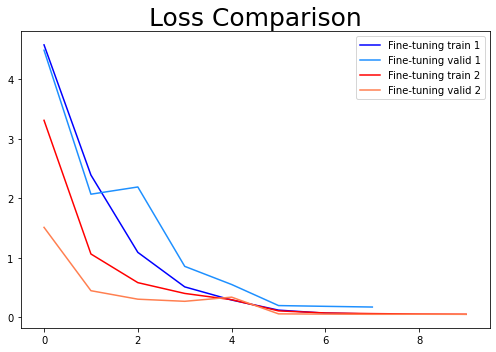

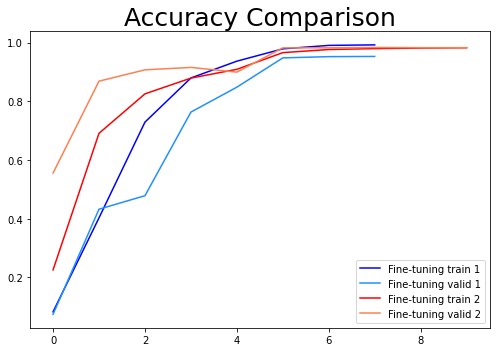

In [18]:
epochs01 = np.arange(0, len(train_acc_1))
epochs02 = np.arange(0, len(train_acc_2))

profile = "Fine-tuning1: 8,000 images of 400 individuals\nFine-tuning2: 144,000 images of the same 400 individuals"
title_label = ["Loss Comparison", "Accuracy Comparison"]
results = [loss_results, acc_results]

for i in range(2):
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.plot(epochs01, results[i][0], c='blue', label="Fine-tuning train 1")
    ax.plot(epochs01, results[i][1], c='dodgerblue', label="Fine-tuning valid 1")
    ax.plot(epochs02, results[i][2], c='red', label="Fine-tuning train 2")
    ax.plot(epochs02, results[i][3], c='coral', label="Fine-tuning valid 2")
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim()
    ax.set_title(title_label[i], fontsize=25)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"/content/here/MyDrive/FaceID/Fine_tuning/{title_label[i]}.png")    
plt.show()

## New functions learnt
- remove file:
    - `os.remove(path)`
- reverse axis
    - `plt.gca().invert_xaxis()`
    - `ax.invert_xaxis()`
- save figure: 
    - `plt.savefig(path)`
    - remember, pyplot clears the memory after `plt.show()`. Be sure to call savefig before that. 
- flatten list: 
    - `import itertools`
    - ` list(itertools.chain(*nested_list))`